# Chinook SQL Sales Analysis in Python

## Project Overview
This project demonstrates SQL analysis using the Chinook SQLite database.
It focuses on understanding customer distribution, revenue, and identifying top customers.
Python (Pandas + Matplotlib) is used to run SQL queries and visualize the results.


In [1]:
import sqlite3

# Connect to the Chinook database
conn = sqlite3.connect("chinook.db")

print("Connected to Chinook database successfully!")

Connected to Chinook database successfully!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load all customer data
df_customers = pd.read_sql_query("SELECT * FROM Customer;", conn)
df_customers.head()


,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


**Insight:** The dataset contains customer details including names, countries, and contact info.  
# This dataset is clean and ready for analysis, no missing values detected.

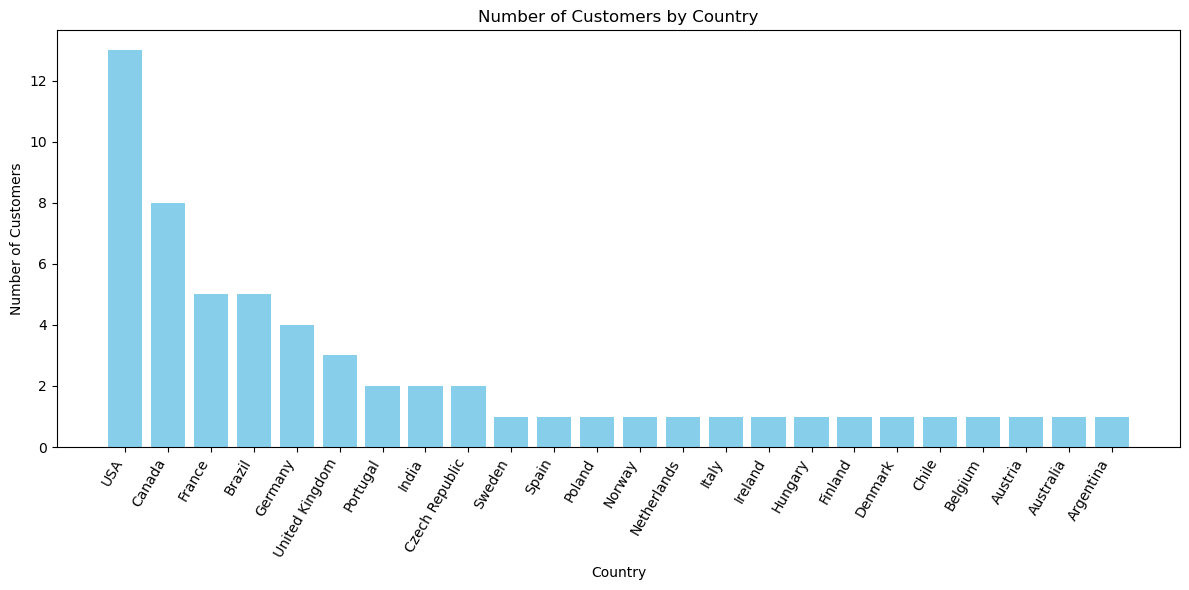

,Country,NumberOfCustomers
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4
5,United Kingdom,3
6,Portugal,2
7,India,2
8,Czech Republic,2
9,Sweden,1


In [4]:
# Customers by country
query_country = """
SELECT Country, COUNT(*) AS NumberOfCustomers
FROM Customer
GROUP BY Country
ORDER BY NumberOfCustomers DESC;
"""
df_country = pd.read_sql_query(query_country, conn)

# Bar chart
plt.figure(figsize=(12,6))
plt.bar(df_country['Country'], df_country['NumberOfCustomers'], color='skyblue')
plt.xticks(rotation=60, ha='right')
plt.title("Number of Customers by Country")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

df_country




**Insight:** The United States has the highest number of customers, followed by Canada, France and Brazil.  
**Recommendation:** Focus marketing campaigns in top countries to maximize revenue, while exploring growth opportunities in countries with fewer customers.


In [5]:
# Top 10 customers
query_top_customers = """
SELECT Customer.FirstName || ' ' || Customer.LastName AS FullName,
       SUM(Invoice.Total) AS TotalSpent
FROM Customer
JOIN Invoice
    ON Customer.CustomerId = Invoice.CustomerId
GROUP BY Customer.CustomerId
ORDER BY TotalSpent DESC
LIMIT 10;
"""
df_top_customers = pd.read_sql_query(query_top_customers, conn)
df_top_customers


,FullName,TotalSpent
0,Helena Holý,49.62
1,Richard Cunningham,47.62
2,Luis Rojas,46.62
3,Ladislav Kovács,45.62
4,Hugh O'Reilly,45.62
5,Frank Ralston,43.62
6,Julia Barnett,43.62
7,Fynn Zimmermann,43.62
8,Astrid Gruber,42.62
9,Victor Stevens,42.62


**Insight:** The top 3 customers contribute significantly more revenue than the rest of the top 10.  
**Recommendation:** Implement loyalty programs or personalized promotions for these high-value customers to increase retention and revenue.


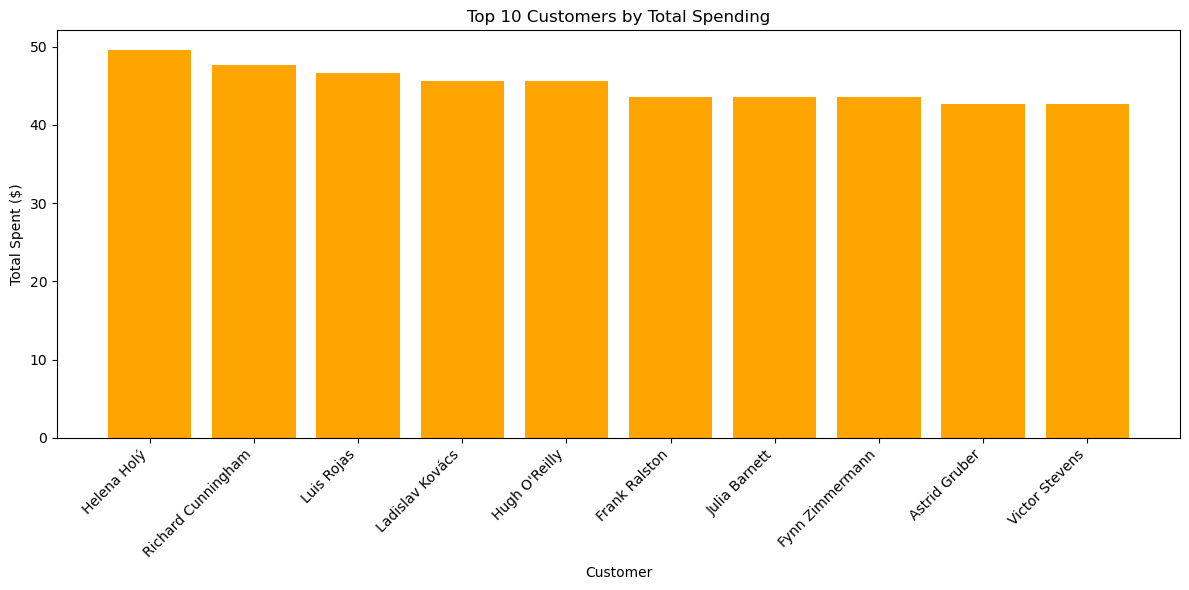

In [6]:
# Bar chart for top 10 customers
plt.figure(figsize=(12,6))
plt.bar(df_top_customers['FullName'], df_top_customers['TotalSpent'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Customer")
plt.ylabel("Total Spent ($)")
plt.tight_layout()
plt.show()


**Insight:** There is a steep drop in total spending after the top 3 customers.  
**Recommendation:** Monitor medium-spending customers to identify potential upsell opportunities and grow overall revenue.


In [7]:
# Close connection
conn.close()
print("Database connection closed.")


Database connection closed.
